In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('2020-4-27.csv')
df.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2209 non-null   object 
 1   Address     2209 non-null   object 
 2   City        2209 non-null   object 
 3   Price       2209 non-null   int64  
 4   Bedroom     2209 non-null   int64  
 5   Bathroom    2209 non-null   int64  
 6   Floors      1038 non-null   float64
 7   Parking     2209 non-null   int64  
 8   Face        2209 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2209 non-null   object 
 11  Area        2209 non-null   object 
 12  Road        2209 non-null   object 
 13  Road Width  2209 non-null   object 
 14  Road Type   1424 non-null   object 
 15  Build Area  2209 non-null   object 
 16  Posted      2209 non-null   object 
 17  Amenities   2209 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 310.8+ KB


## Data Cleaning

In [5]:
null_counts = df.isnull().sum()
null_counts

Title            0
Address          0
City             0
Price            0
Bedroom          0
Bathroom         0
Floors        1171
Parking          0
Face             0
Year          1627
Views            0
Area             0
Road             0
Road Width       0
Road Type      785
Build Area       0
Posted           0
Amenities        0
dtype: int64

In [6]:
# calulate number of missing values for area and build area
def count_na_values(column):
    count = 0
    for value in column:
        if "N/A" in str(value):
            count += 1
    return count
na_counts = df[['Area','Build Area']].apply(count_na_values)
print(na_counts)

Area             0
Build Area    1770
dtype: int64


### Columns not used:
- title
- floors : 1172 out of 2209 values missing
- year : 1629 out of 2209 values missing
- road : dependent on road width and road type
- build area : 1772 out of 2209 values missing
- posted
- amenities: 1067 out of 2209 values missing

In [7]:
sel_cols = ['Address','City','Bedroom','Bathroom','Parking','Face','Views','Area','Road Width','Road Type']
X = df[sel_cols].copy()
y = df['Price']
print(X.tail())
print(y)

                                     Address       City  Bedroom  Bathroom  \
2204             Bhangal, Chapali, Kathmandu  Kathmandu        5         5   
2205          Nagarjun, Sitapaila, Kathmandu  Kathmandu        4         2   
2206  Deuja Chowk, Budhanilkantha, Kathmandu  Kathmandu        5         3   
2207       Bhimsengola, Baneshwor, Kathmandu  Kathmandu        9         3   
2208        Gocha marg, Baluwatar, Kathmandu  Kathmandu        5         2   

      Parking        Face  Views      Area Road Width Road Type  
2204        5  North East   3.1K  1 Ropani    16 Feet       NaN  
2205        1  North East   1.4K  2.5 Aana    13 Feet       NaN  
2206        1        East   1.5K    8 Aana    12 Feet       NaN  
2207        4       North   2.5K   51 Aana    13 Feet       NaN  
2208        5        East  19.6K   13 Aana    12 Feet       NaN  
0        90000000
1        80000000
2        70000000
3       130000000
4       100000000
          ...    
2204       500000
2205     

In [8]:
# keep the middle values of the address columns only
X['Address'] = X['Address'].str.split(',').str[1]
# print(X['Address'])

In [9]:
#convert views like 1k to 1000
def convert_views_to_numeric(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

X['Views'] = X['Views'].apply(convert_views_to_numeric)
# print(X['Views'])

In [10]:
#convert all areas to squre feet
def remove_chars(value):
    pattern = r'[-./,+]' # matches any of the characters '-', '.', '/', ',', '+'
    return re.sub(pattern, '', value)

def convert_to_square_feet(value):
    # print(value)
    value = remove_chars(value)
    if 'Aana' in value:
        return float(value.replace('Aana', '')) * 342.25      
    elif 'Ropani' in value:
        return float(value.replace('Ropani', '')) * 5476
    elif 'ropani aana' in value:
        return float(value.replace('ropani', '')) * 5476
    elif 'Kattha' in value:
        return float(value.replace('Kattha', '')) * 3645
    elif 'Dhur' in value:
        return float(value.replace('Dhur', '')) * 182.25
    elif 'Sq. Feet' in value:
        return float(value.replace('Sq. Feet', ''))
    else:
        return None

X['Area'] = X['Area'].apply(convert_to_square_feet)
# print(X['Area'])

In [11]:
# convert road widht to int
def remove_unit(value):
    if 'Meter' in value:
        return float(value.replace('Meter','')) * 3.28084
    else:
        return float(value.replace('Feet',''))
    
X['Road Width'] = X['Road Width'].apply(remove_unit)

In [12]:
X.head()

,Address,City,Bedroom,Bathroom,Parking,Face,Views,Area,Road Width,Road Type
0,Budhanilkantha,Kathmandu,6,3,10,West,17.0,342250.0,20.0,Blacktopped
1,Budhanilkantha,Kathmandu,5,3,9,East,26.0,718725.0,20.0,Blacktopped
2,Dhapasi,Kathmandu,5,3,12,East,154.0,376475.0,20.0,Blacktopped
3,Baluwatar,Kathmandu,6,4,9,West,17.0,345672.5,20.0,Blacktopped
4,Golfutar,Kathmandu,6,3,10,East,59.0,657120.0,20.0,Blacktopped


In [13]:
# leaving Address for now
X_1 = X.drop('Address',axis=1)
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2209 non-null   object 
 1   Bedroom     2209 non-null   int64  
 2   Bathroom    2209 non-null   int64  
 3   Parking     2209 non-null   int64  
 4   Face        2209 non-null   object 
 5   Views       2209 non-null   float64
 6   Area        1908 non-null   float64
 7   Road Width  2209 non-null   float64
 8   Road Type   1424 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 155.4+ KB


## One hot encoding and feature scaling

In [14]:
# one hot encoding for city, face and road type
from sklearn.preprocessing import OneHotEncoder

obj_cols = ['City','Face','Road Type']
X_encoded = pd.get_dummies(X_1,columns=obj_cols)
X_encoded.head()

,Bedroom,Bathroom,Parking,Views,Area,Road Width,City_Bara,City_Bardiya,City_Bhairahawa,City_Bhaktapur,...,Face_South,Face_South East,Face_South West,Face_West,Road Type_ Alley,Road Type_ Blacktopped,Road Type_ Concrete,Road Type_ Gravelled,Road Type_ Paved,Road Type_ Soil Stabilized
0,6,3,10,17.0,342250.0,20.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,5,3,9,26.0,718725.0,20.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5,3,12,154.0,376475.0,20.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,4,9,17.0,345672.5,20.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,6,3,10,59.0,657120.0,20.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# standard data scaling
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled[:,:5]

array([[ 7.83378786e-01,  4.28348983e-01,  4.29150953e+00,
        -4.13114972e-01, -2.28996257e-02],
       [ 5.43765973e-01,  4.28348983e-01,  3.81421900e+00,
        -4.08941712e-01, -2.28995825e-02],
       [ 5.43765973e-01,  4.28348983e-01,  5.24609060e+00,
        -3.49588678e-01, -2.28996218e-02],
       ...,
       [ 5.43765973e-01,  4.28348983e-01, -4.10526035e-03,
         2.74545564e-01, -2.28996648e-02],
       [ 1.50221723e+00,  4.28348983e-01,  1.42776634e+00,
         7.38241137e-01, -2.28996631e-02],
       [ 5.43765973e-01,  4.89492623e-02,  1.90505687e+00,
         8.66743544e+00, -2.28996646e-02]])

## Data Visualization

C:\Users\Acer\AppData\Local\Temp\ipykernel_8128\615361638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_1.corr()


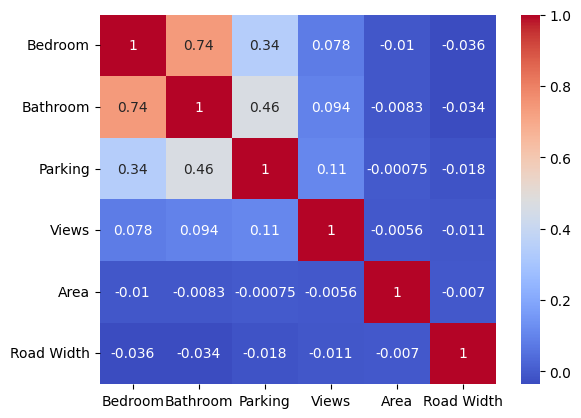

In [21]:
# Calculate the correlation matrix
corr_matrix = X_1.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

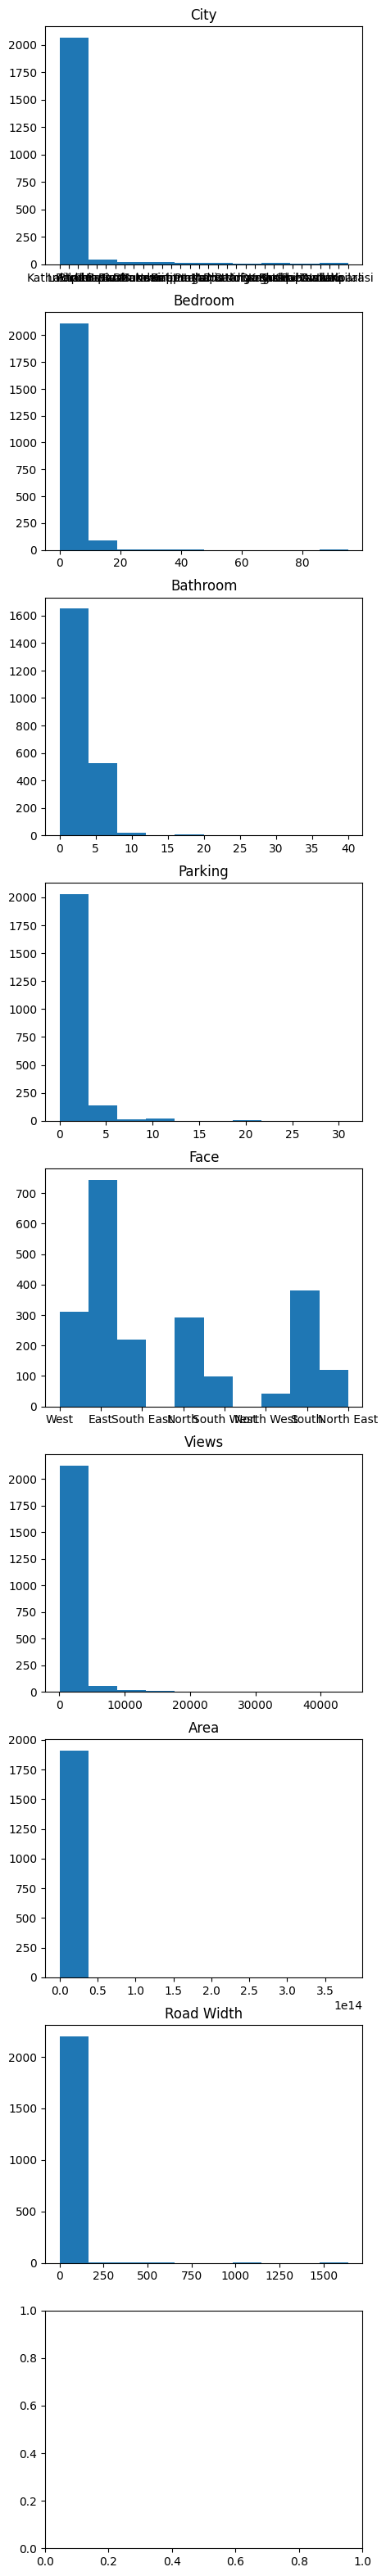

In [24]:
# histogram plots
fig, axs = plt.subplots(X_1.shape[1], figsize=(5, 40))

for i, column in enumerate(X_1.columns):
    axs[i].hist(X_1[column])
    axs[i].set_title(column)

plt.show()

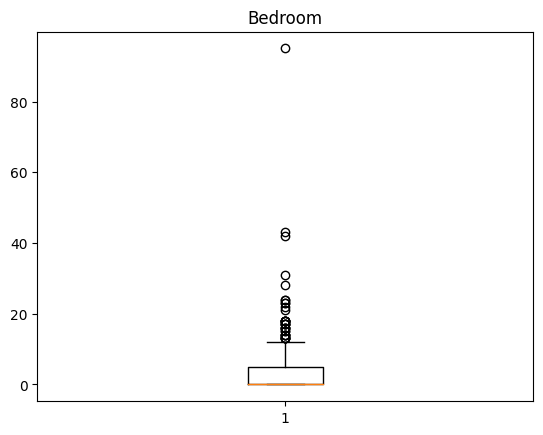

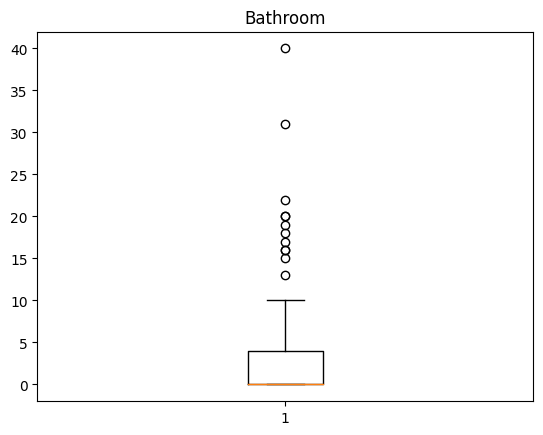

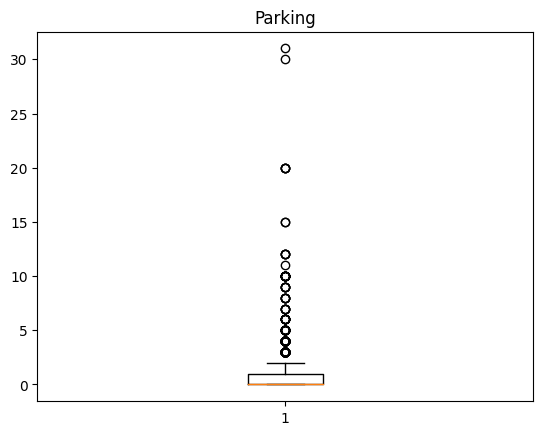

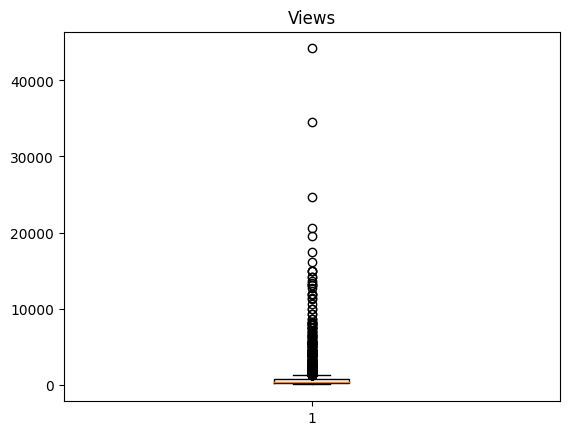

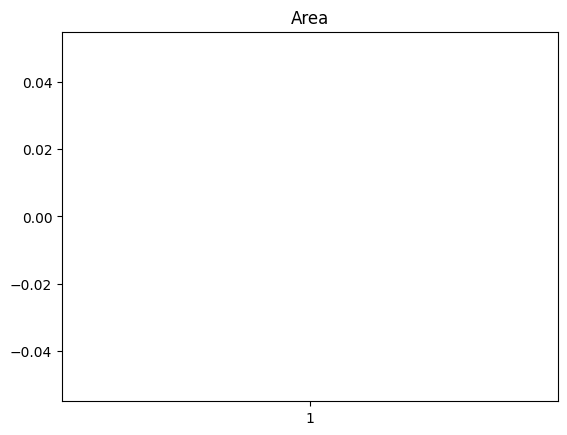

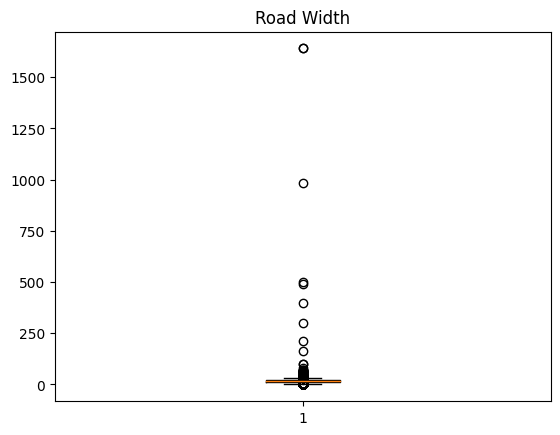

In [26]:
for col in X_1.columns:
    if X_1[col].dtype != object:  # plot only numeric columns
        fig, ax = plt.subplots()
        ax.boxplot(X_1[col])
        ax.set_title(col)
        plt.show()